In [1]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist
import pandas as pd

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import math 

In [4]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: C:\Program Files\PerkinElmerInformatics\ChemOffice2018\ChemScript\Lib
PATH: C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis;C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis\Library\mingw-w64\bin;C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis\Library\usr\bin;C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis\Library\bin;C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis\Scripts;C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis\bin;C:\Users\20224751\AppData\Local\miniconda3\condabin;C:\Program Files\PerkinElmerInformatics\ChemOffice2018\ChemScript\Lib;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0;C:\windows\System32\OpenSSH;C:\Program Files\MATLAB\R2021a\runtime\win64;C:\Program Files\MATLAB\R2021a\bin;C:\Program Files\Wolfram Research\WolframScript;C:\Users\20224751\AppData\Local\Programs\Python\Launcher;C:\Users\20224

### load data CR=0
readBioLogic() requires a single impedance sequence in the file
  
  https://daringfireball.net/projects/markdown/ 
  
$x=\dfrac{1}{y^3}$  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\20224751\Downloads\EIS_data_py.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

        freq/Hz  Re(Z)/Ohm  Im(Z)/Ohm
0   200000.0000      0.431   -2.43000
1   135000.0000      0.413   -1.65000
2    91700.0000      0.408   -1.11000
3    62100.0000      0.407   -0.73500
4    42100.0000      0.411   -0.47700
5    28500.0000      0.418   -0.29500
6    19300.0000      0.431   -0.16500
7    13100.0000      0.448   -0.06820
8     8850.0000      0.470    0.00514
9     5990.0000      0.498    0.06530
10    4060.0000      0.532    0.11800
11    2750.0000      0.578    0.16700
12    1860.0000      0.638    0.21100
13    1260.0000      0.715    0.24300
14     853.0000      0.801    0.25400
15     578.0000      0.884    0.24500
16     391.0000      0.955    0.21900
17     265.0000      1.010    0.18900
18     179.0000      1.040    0.16300
19     122.0000      1.070    0.14500
20      82.3000      1.100    0.13700
21      55.7000      1.120    0.13800
22      37.7000      1.150    0.14500
23      25.6000      1.180    0.16100
24      17.3000      1.220    0.17900
25      11.7

In [6]:
df.columns = [col.strip() for col in df.columns]
print(df.columns)
print(df)

Index(['freq/Hz', 'Re(Z)/Ohm', 'Im(Z)/Ohm'], dtype='object')
        freq/Hz  Re(Z)/Ohm  Im(Z)/Ohm
0   200000.0000      0.431   -2.43000
1   135000.0000      0.413   -1.65000
2    91700.0000      0.408   -1.11000
3    62100.0000      0.407   -0.73500
4    42100.0000      0.411   -0.47700
5    28500.0000      0.418   -0.29500
6    19300.0000      0.431   -0.16500
7    13100.0000      0.448   -0.06820
8     8850.0000      0.470    0.00514
9     5990.0000      0.498    0.06530
10    4060.0000      0.532    0.11800
11    2750.0000      0.578    0.16700
12    1860.0000      0.638    0.21100
13    1260.0000      0.715    0.24300
14     853.0000      0.801    0.25400
15     578.0000      0.884    0.24500
16     391.0000      0.955    0.21900
17     265.0000      1.010    0.18900
18     179.0000      1.040    0.16300
19     122.0000      1.070    0.14500
20      82.3000      1.100    0.13700
21      55.7000      1.120    0.13800
22      37.7000      1.150    0.14500
23      25.6000      1.180 

In [7]:
df.columns

Index(['freq/Hz', 'Re(Z)/Ohm', 'Im(Z)/Ohm'], dtype='object')

In [8]:
data = df.loc[(df['Im(Z)/Ohm'])>-0.06]

In [9]:
z=data['Re(Z)/Ohm'].values-1j*data['Im(Z)/Ohm'].values
print(z.shape)

(33,)


In [10]:
f_data = df.loc[(df['freq/Hz'])<13100.0000] #<13000
a_f= np.array(f_data['freq/Hz'])
print(a_f.shape)

(33,)


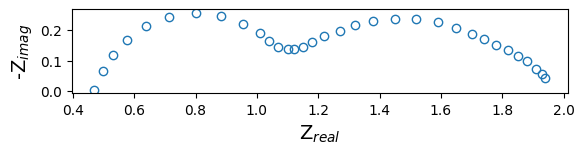

In [11]:
fig, ax = plt.subplots()
ax.plot(z.real, -z.imag, marker='o',mfc='none',ls='none')
ax.set_xlabel(r'Z$_{real}$', size=14)
ax.set_ylabel(r'-Z$_{imag}$',size=14)
ax.set_aspect('equal')

TLMQ (Transmission Line Model with Constant Phase Element):

Represents a transmission line model with a CPE.
It has several parameters including R, L, Q, alpha, n, tau0, A, Lq, Ld, Cq, Cd, Rq, Rd.

In [71]:
# Warbur element 
from impedance.models.circuits import CustomCircuit

circuit = 'L0-p(R1,CPE1)-p(R2,CPE2)-TLMQ0'
initial_guess = [1e-9, .05, 1e-5, 0.1, .5, .05, 1, 0.01, 1e-2, 0.8]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

### Fitting

Freq is used in the model together with Z (impedance- uses ReZ and ImZ)

In [72]:
print(z.shape)
print(a_f.shape)

(33,)
(33,)


In [73]:
# Model fit
circuit.fit(a_f, z)
print(circuit)


Circuit string: L0-p(R1,CPE1)-p(R2,CPE2)-TLMQ0
Fit: True

Initial guesses:
     L0 = 1.00e-09 [H]
     R1 = 5.00e-02 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e-01 []
     R2 = 5.00e-01 [Ohm]
  CPE2_0 = 5.00e-02 [Ohm^-1 sec^a]
  CPE2_1 = 1.00e+00 []
  TLMQ0_0 = 1.00e-02 [Ohm]
  TLMQ0_1 = 1.00e-02 [F sec^(gamma - 1)]
  TLMQ0_2 = 8.00e-01 []

Fit parameters:
     L0 = 1.58e-06  (+/- 3.51e-07) [H]
     R1 = 8.57e-01  (+/- 6.31e-02) [Ohm]
  CPE1_0 = 2.08e-01  (+/- 1.15e-02) [Ohm^-1 sec^a]
  CPE1_1 = 6.09e-01  (+/- 1.81e-02) []
     R2 = 5.69e-01  (+/- 9.70e-02) [Ohm]
  CPE2_0 = 7.53e-04  (+/- 1.38e-04) [Ohm^-1 sec^a]
  CPE2_1 = 8.83e-01  (+/- 4.28e-02) []
  TLMQ0_0 = 8.28e-01  (+/- 1.93e+02) [Ohm]
  TLMQ0_1 = 3.46e+00  (+/- 5.03e+02) [F sec^(gamma - 1)]
  TLMQ0_2 = 2.33e-02  (+/- 1.97e+00) []



In [74]:
# new value of impedance predicted
Z_fit = circuit.predict(a_f)
print(Z_fit)

[0.47960296-0.00499224j 0.49898392-0.06241038j 0.5285367 -0.11711825j
 0.57306817-0.16987104j 0.63640758-0.21619764j 0.71656734-0.24709589j
 0.80450197-0.2554524j  0.88630126-0.24203767j 0.95309128-0.2157483j
 1.00294275-0.18748436j 1.04038393-0.1640563j  1.06952057-0.14901874j
 1.09618969-0.14207851j 1.12268977-0.14295015j 1.15170272-0.1503495j
 1.1848363 -0.1627537j  1.22429174-0.17881482j 1.2706098 -0.19638733j
 1.32368913-0.21304541j 1.38386393-0.22661024j 1.44862094-0.23462022j
 1.51548514-0.2356351j  1.58214895-0.2291632j  1.64485264-0.21596935j
 1.70122504-0.19783467j 1.75040815-0.17674986j 1.79225088-0.15460371j
 1.82675278-0.13320798j 1.85521567-0.11333319j 1.87836789-0.09571256j
 1.90210959-0.07648166j 1.91682415-0.06419508j 1.92895654-0.05407421j]


In [75]:
Zreal_fit=Z_fit.real
Zimm_fit=-Z_fit.imag
print(Zreal_fit)
print(Zimm_fit)

[0.47960296 0.49898392 0.5285367  0.57306817 0.63640758 0.71656734
 0.80450197 0.88630126 0.95309128 1.00294275 1.04038393 1.06952057
 1.09618969 1.12268977 1.15170272 1.1848363  1.22429174 1.2706098
 1.32368913 1.38386393 1.44862094 1.51548514 1.58214895 1.64485264
 1.70122504 1.75040815 1.79225088 1.82675278 1.85521567 1.87836789
 1.90210959 1.91682415 1.92895654]
[0.00499224 0.06241038 0.11711825 0.16987104 0.21619764 0.24709589
 0.2554524  0.24203767 0.2157483  0.18748436 0.1640563  0.14901874
 0.14207851 0.14295015 0.1503495  0.1627537  0.17881482 0.19638733
 0.21304541 0.22661024 0.23462022 0.2356351  0.2291632  0.21596935
 0.19783467 0.17674986 0.15460371 0.13320798 0.11333319 0.09571256
 0.07648166 0.06419508 0.05407421]


In [76]:
#!pip install --upgrade impedance

In [77]:
print(z)

[0.47 -0.00514j 0.498-0.0653j  0.532-0.118j   0.578-0.167j
 0.638-0.211j   0.715-0.243j   0.801-0.254j   0.884-0.245j
 0.955-0.219j   1.01 -0.189j   1.04 -0.163j   1.07 -0.145j
 1.1  -0.137j   1.12 -0.138j   1.15 -0.145j   1.18 -0.161j
 1.22 -0.179j   1.27 -0.196j   1.32 -0.215j   1.38 -0.229j
 1.45 -0.236j   1.52 -0.236j   1.59 -0.224j   1.65 -0.207j
 1.7  -0.187j   1.74 -0.169j   1.78 -0.151j   1.82 -0.135j
 1.85 -0.116j   1.88 -0.0972j  1.91 -0.0737j  1.93 -0.0555j
 1.94 -0.0421j ]


In [78]:
zreal=z.real
zimag=-z.imag
print(zreal)
print(zimag)

[0.47  0.498 0.532 0.578 0.638 0.715 0.801 0.884 0.955 1.01  1.04  1.07
 1.1   1.12  1.15  1.18  1.22  1.27  1.32  1.38  1.45  1.52  1.59  1.65
 1.7   1.74  1.78  1.82  1.85  1.88  1.91  1.93  1.94 ]
[0.00514 0.0653  0.118   0.167   0.211   0.243   0.254   0.245   0.219
 0.189   0.163   0.145   0.137   0.138   0.145   0.161   0.179   0.196
 0.215   0.229   0.236   0.236   0.224   0.207   0.187   0.169   0.151
 0.135   0.116   0.0972  0.0737  0.0555  0.0421 ]


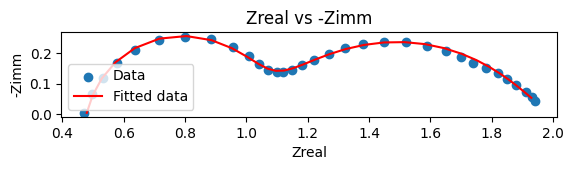

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter(zreal, zimag, label='Data')
plt.plot(Zreal_fit, Zimm_fit, label='Fitted data', color='red')
plt.xlabel('Zreal')
plt.ylabel('-Zimm')
plt.title('Zreal vs -Zimm')
ax.set_aspect('equal')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(zimag, Zimm_fit)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0001660616508866749


In [70]:
import math

pi_v= math.pi
f=a_f
w=2*pi_v*(f)
print(w)

[5.56061900e+04 3.76362800e+04 2.55097323e+04 1.72787596e+04
 1.16867247e+04 7.91681349e+03 5.35955707e+03 3.63168111e+03
 2.45672546e+03 1.66504411e+03 1.12469017e+03 7.66548607e+02
 5.17106151e+02 3.49973422e+02 2.36876086e+02 1.60849544e+02
 1.08699106e+02 7.35132681e+01 4.98884913e+01 3.37407051e+01
 2.28707945e+01 1.55194677e+01 1.04929195e+01 7.09999940e+00
 4.81291995e+00 3.26097317e+00 2.20539804e+00 1.49539810e+00
 1.01159283e+00 6.84867198e-01 4.13433593e-01 2.78973428e-01
 1.88495559e-01]
